In [1]:
from termcolor import colored
print(colored('\x1B[1mImporting library','blue'))
import gc
gc.enable
import nltk
import random 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None


from google.colab import drive


import re
import nltk
import spacy
import string

from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

Importing library


In [2]:
print(colored('\x1B[1mMounting drive on colab','blue'))
drive.mount('/content/drive')

Mounting drive on colab
Mounted at /content/drive


In [3]:
print(colored('\x1B[1mDownloading all packages of NLTK','blue'))

In [4]:
## Setting up environvenment on colabs 
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

### Loading the dataset 

In [5]:
print(colored('\x1B[1mLoading data','blue'))
print(colored('\x1B[1mTaking randomly 15000','blue'))

ndf= pd.read_csv('/content/drive/MyDrive/Files/blogtext.csv', index_col=False)
data_orignal=ndf.sample(n=15000, random_state=0)

## To complete dataset
# data_orignal = pd.read_csv('blogtext.csv',index_col=False)

Loading data
Taking randomly 15000


In [6]:
print(colored('\x1B[1mDroping irrelavant columns such as Date and id','blue'))
# droping id and date columns
data_orignal.drop(labels=['id','date'], axis=1,inplace=True)

Droping irrelavant columns such as Date and id


In [7]:
print(colored('\x1B[1mRandomize the rows of the data','blue'))
data_orignal = data_orignal.sample(frac=1).reset_index(drop=True)

Randomize the rows of the data


In [8]:
print(colored('\x1B[1mRemoving all the duplicate rows from the data','blue'))
data_orignal = data_orignal[data_orignal.duplicated(keep='first') == False]

print(colored('\x1B[1mFinal shape of the data','blue'))
data_orignal.shape

Removing all the duplicate rows from the data
Final shape of the data


(14975, 5)

In [9]:
data_orignal.tail()

,gender,age,topic,sign,text
14995,male,15,Student,Aquarius,I looked upon the world A pulsing light...
14996,female,34,indUnk,Cancer,Im mel ha ! I've discove...
14997,male,15,Student,Scorpio,now before i start i'd just like to say...
14998,male,25,Chemicals,Aquarius,i'll draw them a graph with a line on i...
14999,male,13,Student,Taurus,Skin Your iPod So Jeff's friend Ma...


In [10]:
print(colored('\x1B[1mInformation of the data','blue'))
data_orignal.info()

Information of the data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14975 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  14975 non-null  object
 1   age     14975 non-null  int64 
 2   topic   14975 non-null  object
 3   sign    14975 non-null  object
 4   text    14975 non-null  object
dtypes: int64(1), object(4)
memory usage: 702.0+ KB


### Preprocessing

Some of the common text preprocessing / cleaning steps are:

    
    - [ ] remove unwanted space 
    - [ ] remove unwanted characters / remove Punctuation
    - [ ] remove Stopwords 
    - [ ] convert text to lowercase



In [11]:
print(colored('\x1B[1mOrignal text','blue'))
df = data_orignal[["text"]]
df[:5]

Orignal text


,text
0,well today is Saturday and i'm suppose ...
1,not until august time if I remember cor...
2,I set up my Senior Pictures S...
3,40 days to go. Heading to Houston ...
4,I was in Johnson City the other day...


In [12]:
print(colored('\x1B[1mFunction for removing punctuations','blue'))
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('','',PUNCT_TO_REMOVE))

Function for removing punctuations


In [13]:
print(colored('\x1B[1mFunction for removing stop word','blue'))
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

Function for removing stop word


In [14]:
print(colored('\x1B[1mFunction for Lemmatization','blue'))
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

Function for Lemmatization


In [15]:
print(colored('\x1B[1mUsing Pipeline for pre-processing the text','blue'))
print(colored('''\x1B[1m1.Removing Puntucation\n2.Removing Stop Words\n3.Lemmatization\n4.Lower-CaseStrip\n5.Strip'''))
def clean_text(text):
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = lemmatize_words(text)
    text = text.lower()
    text = text.strip()
    return text

data_orignal["text"] = data_orignal["text"].map(lambda text : clean_text(text))

Using Pipeline for pre-processing the text
1.Removing Puntucation
2.Removing Stop Words
3.Lemmatization
4.Lower-CaseStrip
5.Strip


## EDA 

In [16]:
print(colored('\x1B[1mProcessed Dataframe','blue'))
pd.set_option('display.max_colwidth', 50)
data_orignal.head(10)

Processed Dataframe


,gender,age,topic,sign,text
0,female,14,Student,Virgo,well today saturday im suppose go movie hope g...
1,male,25,Banking,Cancer,august time i remember correctly
2,female,17,indUnk,Taurus,i set senior pictures setting yesterday septem...
3,male,24,Technology,Cancer,40 day go heading houston weekend spend time o...
4,female,38,indUnk,Virgo,i johnson city day book store i saw bunch peop...
5,female,38,indUnk,Virgo,aaron copeland never make gray station late su...
6,male,27,Law,Gemini,who say kerry afraid take firm position contro...
7,female,45,Technology,Virgo,baseball fever the urllink red sox tie series ...
8,male,24,Engineering,Leo,know say go start write day leave uk decide il...
9,male,25,indUnk,Capricorn,chris southern illinois in eric cartman voice ...


In [17]:
print(colored('\x1B[1mChecking null/missing values of data','blue'))
data_orignal.isnull().any().any()

Checking null/missing values of data


False

In [18]:
print(colored('\x1B[1mDescripition of numerical column','blue'))
data_orignal.describe(include = [np.number]).T

Descripition of numerical column


,count,mean,std,min,25%,50%,75%,max
age,14975.0,24.010217,7.786998,13.0,17.0,24.0,27.0,48.0


In [19]:
print(colored('\x1B[1mDescripition of categorical column','blue'))
data_orignal.describe(include = [np.object]).T

Descripition of categorical column


,count,unique,top,freq
gender,14975,2,male,7639
topic,14975,40,indUnk,5455
sign,14975,12,Aries,1427
text,14975,14796,,70


In [20]:
print(colored('\x1B[1mMemory analysis for dataframe','blue'))
orignal_mem = data_orignal.memory_usage(deep=True)
orignal_mem

Memory analysis for dataframe


Index       119800
gender      928147
age         119800
topic       970611
sign        947918
text      12490804
dtype: int64

In [21]:
print(colored('\x1B[1mConverting object datatype to categorical datatype','blue'))
catagorical_coloumns = ["gender", "topic", "sign"]
data_orignal[catagorical_coloumns] = data_orignal[catagorical_coloumns].astype("category")

Converting object datatype to categorical datatype


In [22]:
print(colored('\x1B[1mValue count of gender','blue'))
data_orignal.gender.value_counts()

Value count of gender


male      7639
female    7336
Name: gender, dtype: int64

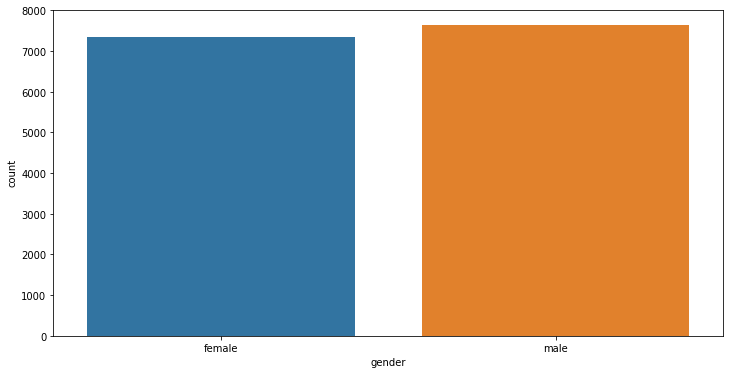

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x="gender", data=data_orignal)

In [24]:
print(colored('\x1B[1mValue count of age','blue'))
print(data_orignal.age.value_counts())

Value count of age
24    1771
17    1765
16    1594
23    1591
25    1498
26    1236
27    1018
15     883
14     570
34     467
33     411
35     371
36     329
13     294
37     220
38     158
40     124
39     105
48      89
43      85
45      83
41      74
42      69
46      66
44      53
47      51
Name: age, dtype: int64


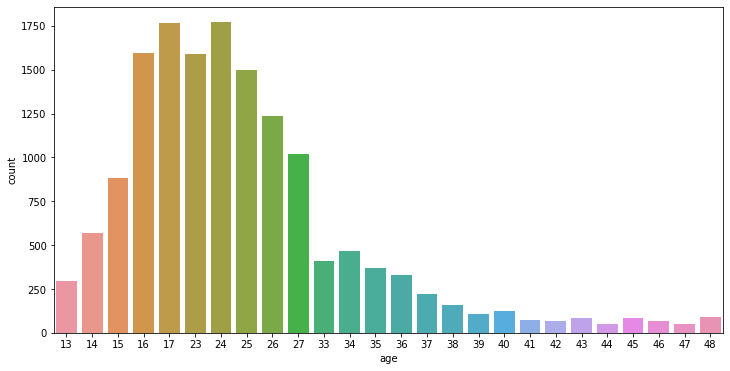

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(x="age", data=data_orignal)

In [26]:
print(colored('\x1B[1mValue count of sign','blue'))
print(data_orignal.sign.value_counts())

Value count of sign
Aries          1427
Cancer         1416
Virgo          1371
Libra          1368
Taurus         1344
Scorpio        1231
Leo            1205
Gemini         1147
Pisces         1146
Capricorn      1118
Aquarius       1107
Sagittarius    1095
Name: sign, dtype: int64


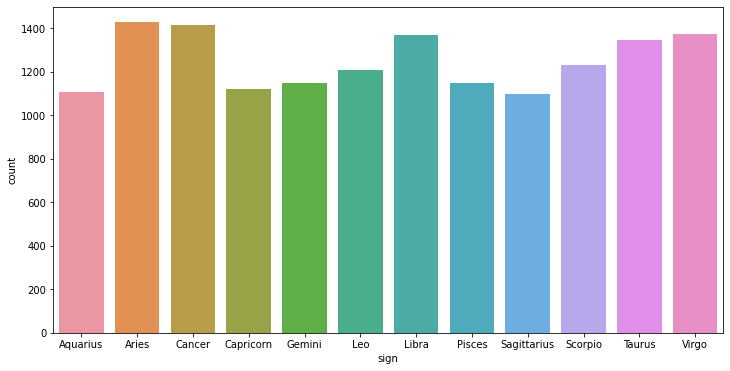

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x="sign", data=data_orignal)

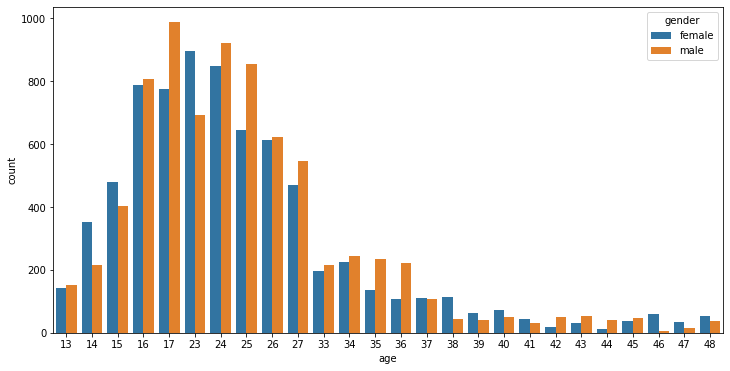

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x="age", hue="gender", data=data_orignal)

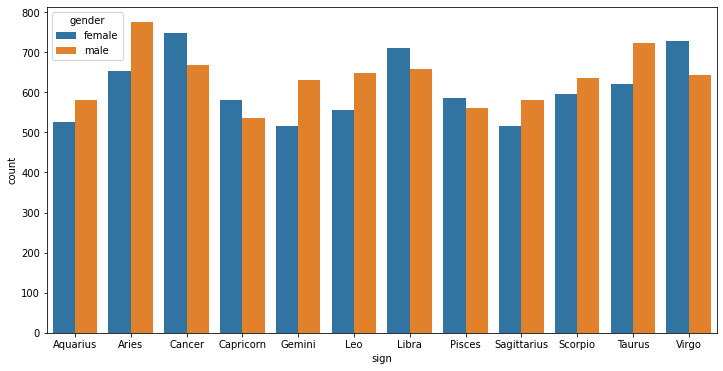

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x="sign", hue="gender", data=data_orignal)

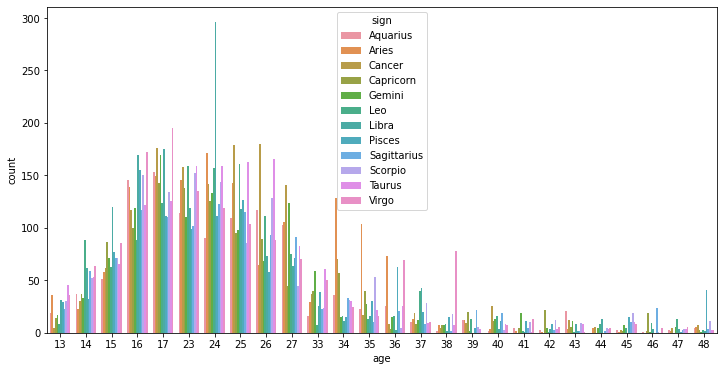

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x="age", hue="sign", data=data_orignal)

### Merge labels for multi-label classification problem 

In [31]:
print(colored('\x1B[1mCreating target column with multi-feature','blue'))
data_orignal["age"] = data_orignal["age"].astype(str)
data_orignal["labels"] = data_orignal.apply(lambda col :
                            [col["gender"],col["age"],col["topic"],col["sign"]],axis =1)

Creating target column with multi-feature


In [32]:
print(colored('\x1B[1mDroping individual multi-feature','blue'))
data_orignal.drop(columns=["gender","age","sign","topic"],axis =1, inplace = True)
gc.collect()

Droping individual multi-feature


74

In [33]:
print(colored('\x1B[1mFinal data frame','blue'))
data_orignal.head(10)

Final data frame


,text,labels
0,well today saturday im suppose go movie hope g...,"[female, 14, Student, Virgo]"
1,august time i remember correctly,"[male, 25, Banking, Cancer]"
2,i set senior pictures setting yesterday septem...,"[female, 17, indUnk, Taurus]"
3,40 day go heading houston weekend spend time o...,"[male, 24, Technology, Cancer]"
4,i johnson city day book store i saw bunch peop...,"[female, 38, indUnk, Virgo]"
5,aaron copeland never make gray station late su...,"[female, 38, indUnk, Virgo]"
6,who say kerry afraid take firm position contro...,"[male, 27, Law, Gemini]"
7,baseball fever the urllink red sox tie series ...,"[female, 45, Technology, Virgo]"
8,know say go start write day leave uk decide il...,"[male, 24, Engineering, Leo]"
9,chris southern illinois in eric cartman voice ...,"[male, 25, indUnk, Capricorn]"


### Create train and test dataset

In [34]:
print(colored('\x1B[1mSplitting data into train, test and validation sets','blue'))
X = data_orignal.text
y = data_orignal.labels
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,
                                                   test_size = 0.2,
                                                  shuffle = True)



Splitting data into train, test and validation sets


In [35]:
print("shape of training set :", X_train.shape)
print("shape of test set :", X_test.shape)

shape of training set : (11980,)
shape of test set : (2995,)


### Vectorizing the features 

In [36]:
print(colored('\x1B[1mVectorizing the features\n1. Bag of words\n2. TfIDF','green'))

Vectorizing the features
1. Bag of words
2. TfIDF


In [37]:
print(colored('\x1B[1mBag of words','blue'))
print(colored('\x1B[1mInitializing CountVectorizer','blue'))
ctv = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                      ngram_range=(1, 3), stop_words = 'english')

Bag of words
Initializing CountVectorizer


In [38]:
print(colored('\x1B[1mFitting X_train and X_test data to CountVectorizer','blue'))
ctv.fit(X_train)

Fitting X_train and X_test data to CountVectorizer


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 3), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
                vocabulary=None)

In [39]:
print(colored('\x1B[1mTransforming X_train','blue'))
xtrain_ctv = ctv.transform(X_train)

print(colored('\x1B[1mTransforming X_test','blue'))
xtest_ctv = ctv.transform(X_test)

Transforming X_train
Transforming X_test


####  TF-IDF (Term Frequency - Inverse Document Frequency)

In [40]:
print(colored('\x1B[1mTF-IDF','blue'))
print(colored('\x1B[1mInitializing TfidfVectorizer','blue'))

tfv = TfidfVectorizer(min_df=3,  max_features=None, 
                      strip_accents='unicode', analyzer='word',
                      token_pattern=r'\w{1,}',ngram_range=(1, 3), 
                      use_idf=1,smooth_idf=1,sublinear_tf=1,
                      stop_words = 'english')

TF-IDF
Initializing TfidfVectorizer


In [41]:
print(colored('\x1B[1mFitting X_train TF-IDFVectorizer','blue'))
tfv.fit(X_train)

Fitting X_train TF-IDFVectorizer


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=3, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=1, stop_words='english', strip_accents='unicode',
                sublinear_tf=1, token_pattern='\\w{1,}', tokenizer=None,
                use_idf=1, vocabulary=None)

In [42]:
print(colored('\x1B[1mTransforming X_train data','blue'))
xtrain_tfv =  tfv.transform(X_train) 

print(colored('\x1B[1mTransforming X_train data','blue'))
xtest_tfv = tfv.transform(X_test)

Transforming X_train data
Transforming X_train data


### Create a dictionary to get the count of every label 

In [43]:
label_counts=dict()

for labels in data_orignal.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

### Transform the labels

In [44]:
print(colored('\x1B[1mBinarizing target column','blue'))

binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

y_train = binarizer.fit_transform(y_train)
y_test = binarizer.transform(y_test)

Binarizing target column


In [45]:
print(colored('\x1B[1mTotal no. of classes','blue'))
len(binarizer.classes_)

Total no. of classes


80

In [46]:
print(colored('\x1B[1mLegth of each array ','blue'))
len(y_train[0])

Legth of each array 


80

### Multi-Label Classification Techniques

In [47]:
print(colored('\x1B[1mFunctions for metrics','blue'))
print(colored('\x1B[1m1.Micro Metrics\n2.Macro Metrics\n3.Weighted Metrics','green'))

def display_metrics_micro(Ytest, Ypred):
    print(colored('\x1B[1mAccuracy score: ','blue'))
    print(accuracy_score(Ytest, Ypred))
    print(colored('\x1B[1mF1 score: Micro','blue'))
    print(f1_score(Ytest, Ypred, average='micro'))
    print(colored('\x1B[1mAverage precision score: Micro','blue'))
    print(average_precision_score(Ytest, Ypred, average='micro'))
    print(colored('\x1B[1mAverage recall score: Micro','blue'))
    print(recall_score(Ytest, Ypred, average='micro'))
    
    
def display_metrics_macro(Ytest, Ypred):
    print(colored('\x1B[1mAccuracy score: ','blue'))
    print(accuracy_score(Ytest, Ypred))
    print(colored('\x1B[1mF1 score: Macro','blue'))
    print(f1_score(Ytest, Ypred, average='macro'))
    print(colored('\x1B[1mAverage recall score: MAcro','blue'))
    print(recall_score(Ytest, Ypred, average='macro'))
    
def display_metrics_weighted(Ytest, Ypred):
    print(colored('\x1B[1mAccuracy score: ','blue'))
    print(accuracy_score(Ytest, Ypred))
    print(colored('\x1B[1mF1 score: weighted','blue'))
    print(f1_score(Ytest, Ypred, average='weighted'))
    print(colored('\x1B[1mAverage precision score: weighted','blue'))
    print(average_precision_score(Ytest, Ypred, average='weighted'))
    print(colored('\x1B[1mAverage recall score: weighted','blue'))
    print(recall_score(Ytest, Ypred, average='weighted'))

Functions for metrics
1.Micro Metrics
2.Macro Metrics
3.Weighted Metrics


### Classifier using BOW

In [48]:
print(colored('\x1B[1mUsing pipeline for applying logistic regression and one vs rest classifier','blue'))
print(colored('\x1B[1mFitting data to classifier','blue'))

clsfr = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='lbfgs'),
                    n_jobs=-1)),])
clsfr.fit(xtrain_ctv, y_train)

Y_predicted_oneVsRest = clsfr.predict(xtest_ctv)

Using pipeline for applying logistic regression and one vs rest classifier
Fitting data to classifier


In [49]:
print(colored('\x1B[1mClassification Report','blue'))
print(classification_report(y_test,Y_predicted_oneVsRest))

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       1.00      0.01      0.02       120
           2       0.17      0.02      0.03       179
           3       0.41      0.04      0.08       334
           4       0.36      0.04      0.08       373
           5       0.21      0.01      0.02       286
           6       0.33      0.02      0.03       337
           7       0.23      0.01      0.02       294
           8       0.00      0.00      0.00       235
           9       0.00      0.00      0.00       210
          10       0.25      0.01      0.02        84
          11       0.25      0.01      0.02       102
          12       0.25      0.03      0.05        80
          13       0.00      0.00      0.00        70
          14       0.00      0.00      0.00        44
          15       0.00      0.00      0.00        23
          16       0.00      0.00      0.00        21
     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
print(colored('\x1B[1mMetrics Micro BOW','blue'))
print(display_metrics_micro(y_test,Y_predicted_oneVsRest))

Metrics Micro BOW
Accuracy score: 
0.001335559265442404
F1 score: Micro
0.2816672906526894
Average precision score: Micro
0.1456747384213432
Average recall score: Micro
0.18839732888146912
None


In [51]:
print(colored('\x1B[1mMetrics Macro BOW','blue'))
print(display_metrics_macro(y_test,Y_predicted_oneVsRest))

Metrics Macro BOW
Accuracy score: 
0.001335559265442404
F1 score: Macro
0.034440622816963376
Average recall score: MAcro
0.027209544063036835
None


In [52]:
print(colored('\x1B[1mMetrics Weighted BOW','blue'))
print(display_metrics_weighted(y_test,Y_predicted_oneVsRest))

Metrics Weighted BOW
Accuracy score: 
0.001335559265442404
F1 score: weighted
0.20430073448647212
Average precision score: weighted
0.24046347907400864
Average recall score: weighted
0.18839732888146912
None


### Let's check for any 5 inputs and there predicted labels

In [53]:
print(colored('\x1B[1mFunction for true label and predicted label BOW','blue'))


def print_predicted(y_predicted, y_test = y_test , n = 5):
    j = []
    for i in range(n):
        j.append(random.randint(0, len(y_test)))
    print(j)
                 
    for k in j:
        print(binarizer.inverse_transform(y_predicted)[k])
        print(binarizer.inverse_transform(y_test)[k])
        print("=================x==================x================x==========")

Function for true label and predicted label BOW


In [54]:
print(colored('\x1B[1mTrue label and predicted label for any five examples','blue'))
print_predicted(y_predicted=Y_predicted_oneVsRest,y_test=y_test, n= 10)

True label and predicted label for any five examples
[1043, 1812, 29, 1184, 1853, 1182, 2990, 1812, 1462, 680]
('female',)
('15', 'Aquarius', 'Student', 'male')
=================x==================x================x==========
('male',)
('25', 'Arts', 'Sagittarius', 'male')
=================x==================x================x==========
('male',)
('17', 'Gemini', 'indUnk', 'male')
=================x==================x================x==========
('35', 'Aries', 'Technology', 'female')
('17', 'Libra', 'Student', 'female')
=================x==================x================x==========
('male',)
('17', 'Capricorn', 'Student', 'female')
=================x==================x================x==========
('male',)
('37', 'Cancer', 'Religion', 'male')
=================x==================x================x==========
('female', 'indUnk')
('25', 'Manufacturing', 'Virgo', 'male')
=================x==================x================x==========
('male',)
('25', 'Arts', 'Sagittarius', 'male')
======

### Classifier using Tf-Idf

In [55]:
print(colored('\x1B[1mUsing pipeline for applying logistic regression and one vs rest classifier','blue'))
print(colored('\x1B[1mFitting data to classifier','blue'))

clsfr = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='lbfgs'),
                    n_jobs=-1)),])

clsfr.fit(xtrain_tfv, y_train)

Y_predicted_oneVsRest = clsfr.predict(xtest_tfv)

Using pipeline for applying logistic regression and one vs rest classifier
Fitting data to classifier


In [56]:
print(colored('\x1B[1mClassification Report Tf-Idf','blue'))
print(classification_report(y_test,Y_predicted_oneVsRest))

Classification Report Tf-Idf
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.00      0.00      0.00       120
           2       0.00      0.00      0.00       179
           3       0.00      0.00      0.00       334
           4       0.00      0.00      0.00       373
           5       0.00      0.00      0.00       286
           6       0.00      0.00      0.00       337
           7       0.00      0.00      0.00       294
           8       0.00      0.00      0.00       235
           9       0.00      0.00      0.00       210
          10       0.00      0.00      0.00        84
          11       0.00      0.00      0.00       102
          12       0.00      0.00      0.00        80
          13       0.00      0.00      0.00        70
          14       0.00      0.00      0.00        44
          15       0.00      0.00      0.00        23
          16       0.00      0.00      0.00        2

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
print(colored('\x1B[1mMetrics Micro Tf-Idf','blue'))
print(display_metrics_micro(y_test,Y_predicted_oneVsRest))

Metrics Micro Tf-Idf
Accuracy score: 
0.0
F1 score: Micro
0.2683731362976646
Average precision score: Micro
0.15017622721317572
Average recall score: Micro
0.16978297161936562
None


In [58]:
print(colored('\x1B[1mMetrics Macro Tf-Idf','blue'))
print(display_metrics_macro(y_test,Y_predicted_oneVsRest))

Metrics Macro Tf-Idf
Accuracy score: 
0.0
F1 score: Macro
0.01854696084186681
Average recall score: MAcro
0.017517108755897636
None


In [59]:
print(colored('\x1B[1mMetrics Weighted Tf-Idf','blue'))
print(display_metrics_weighted(y_test,Y_predicted_oneVsRest))

Metrics Weighted Tf-Idf
Accuracy score: 
0.0
F1 score: weighted
0.1756275336323629
Average precision score: weighted
0.2426528367608967
Average recall score: weighted
0.16978297161936562
None


### Let's check for any 5 inputs and there predicted labels

In [60]:
print(colored('\x1B[1mFunction for true label and predicted label','blue'))


def print_predicted(y_predicted, y_test = y_test , n = 5):
    j = []
    for i in range(n):
        j.append(random.randint(0, len(y_test)))
    print(j)
                 
    for k in j:
        print(binarizer.inverse_transform(y_predicted)[k])
        print(binarizer.inverse_transform(y_test)[k])
        print("=================x==================x================x==========")

Function for true label and predicted label


In [61]:
print(colored('\x1B[1mTrue label and predicted label for any five examples','blue'))
print_predicted(y_predicted=Y_predicted_oneVsRest,y_test=y_test, n= 10)

True label and predicted label for any five examples
[2722, 1902, 2257, 1395, 2949, 1325, 2953, 167, 471, 229]
('male',)
('24', 'Gemini', 'Non-Profit', 'female')
=================x==================x================x==========
('male',)
('16', 'Arts', 'Gemini', 'male')
=================x==================x================x==========
('female',)
('17', 'Student', 'Virgo', 'male')
=================x==================x================x==========
('female',)
('17', 'Arts', 'Virgo', 'female')
=================x==================x================x==========
('female',)
('13', 'Scorpio', 'Student', 'female')
=================x==================x================x==========
('male',)
('16', 'Aries', 'Telecommunications', 'female')
=================x==================x================x==========
('male',)
('16', 'Capricorn', 'Student', 'male')
=================x==================x================x==========
('female',)
('17', 'Leo', 'Student', 'female')
=================x==================x=====